# POPULATION DENSITY MAP USING GEOPANDAS
- DEVELOP A POPULATION DENSITY MAP OF BANGLADESH
- GET DATASET, GET SHAPEFILE, GET PACKAGES (PYOGRIO, FIONA, GEOPANDAS,SHAPELY, ADJUSTTEXT)
- PLOT THE DATA WITH LEGEND AND LABEL

## IMPORTING PACKAGES

In [1]:
import pyogrio
#import fiona
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly as py
import chart_studio.plotly as pc
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline

## IMPORTING DISTRICT WISE POPULATION DATA OF BD

In [2]:
df = pd.read_csv('64_DISTRICTS_OF_BANGLADESH_WITH_LAT_LONG CSV.csv')

In [3]:
df.head(5)

,Name,Formatted address,Latitude,Longitude,Established,Street,Postal code,City,Country,Region,Population (thousands),Area (km2),Department,Bengali Name(BIJOY 52),Unnamed: 14,Unnamed: 15,Pop_1991,Pop_2001,Pop_2011,Pop_2021
0,Bagerhat,"Bagerhat, Bangladesh",22.655452,89.766153,1984,NaN,NaN,Bagerhat,Bangladesh,Khulna Division,1461,3959,Bagerhat District,বাগেরহাট,NaN,NaN,"1,431,332","1,549,031","1,476,090","1,675,000"
1,Bandarban,"Bandarban, Bangladesh",22.193563,92.218748,1981,NaN,NaN,Bandarban,Bangladesh,Chittagong Division,405,4479,Bandarban District,বান্দরবান,NaN,NaN,"230,569","298,120","388,335","469,000"
2,Barguna,"Barguna, Bangladesh",22.160505,90.120064,1984,NaN,NaN,Barguna,Bangladesh,Barisal Division,901,1940,Barguna District,বরগুনা,NaN,NaN,"775,693","848,554","892,781","1,013,000"
3,Barisal,"Barishal, Bangladesh",22.701002,90.353451,1797,NaN,NaN,Barishal,Bangladesh,Barisal Division,2426,2786,Barisal District,বরিশাল,NaN,NaN,"2,207,426","2,355,967","2,324,310","2,776,000"
4,Bhola,"Bhola, Bangladesh",22.685469,90.643903,1984,NaN,NaN,Bhola,Bangladesh,Barisal Division,1947,3405,Bhola District,ভোলা,NaN,NaN,"1,476,328","1,703,117","1,776,795","2,057,000"


In [4]:
df.tail(5)

,Name,Formatted address,Latitude,Longitude,Established,Street,Postal code,City,Country,Region,Population (thousands),Area (km2),Department,Bengali Name(BIJOY 52),Unnamed: 14,Unnamed: 15,Pop_1991,Pop_2001,Pop_2011,Pop_2021
59,Sirajganj,"Sirajganj, Bangladesh",24.452646,89.681621,1984,NaN,NaN,Sirajganj,Bangladesh,Rajshahi Division,3072,2498,Sirajganj District,সিরাজগঞ্জ,NaN,NaN,"2,263,573","2,693,814","3,097,489","3,707,000"
60,Sunamganj,"Sunamganj, Bangladesh",25.066655,91.407239,1984,NaN,NaN,Sunamganj,Bangladesh,Sylhet Division,2443,3670,Sunamganj District,সুনামগঞ্জ,NaN,NaN,"1,708,563","2,013,738","2,467,968","3,091,000"
61,Sylhet,"Sylhet, Bangladesh",24.894929,91.868706,1782,NaN,NaN,Sylhet,Bangladesh,Sylhet Division,5316,3490,Sylhet District,সিলেট,NaN,NaN,"2,153,301","2,555,566","3,434,188","4,408,000"
62,Tangail,"Tangail, Bangladesh",24.251345,89.916710,1969,NaN,NaN,Tangail,Bangladesh,Dhaka Division,3750,3414,Tangail District,টাঙ্গাইল,NaN,NaN,"3,002,428","3,290,696","3,605,083","4,105,000"
63,Thakurgaon,"Thakurgaon, Bangladesh",26.027365,88.464611,1984,NaN,NaN,Thakurgaon,Bangladesh,Rangpur Division,1380,1810,Thakurgaon District,ঠাকুরগাঁও,NaN,NaN,"1,010,948","1,214,376","1,390,042","1,668,000"


In [5]:
df.columns

Index(['Name', 'Formatted address', 'Latitude', 'Longitude', 'Established',
       'Street', 'Postal code', 'City', 'Country', 'Region',
       'Population (thousands)', 'Area (km2)', 'Department',
       'Bengali Name(BIJOY 52)', 'Unnamed: 14', 'Unnamed: 15', 'Pop_1991',
       'Pop_2001', 'Pop_2011', 'Pop_2021'],
      dtype='object')

In [6]:
df.drop(['Street', 'Postal code', 'Unnamed: 14', 'Unnamed: 15'], axis=1,inplace = True)

In [7]:
df.columns

Index(['Name', 'Formatted address', 'Latitude', 'Longitude', 'Established',
       'City', 'Country', 'Region', 'Population (thousands)', 'Area (km2)',
       'Department', 'Bengali Name(BIJOY 52)', 'Pop_1991', 'Pop_2001',
       'Pop_2011', 'Pop_2021'],
      dtype='object')

In [8]:
df.tail(3)

,Name,Formatted address,Latitude,Longitude,Established,City,Country,Region,Population (thousands),Area (km2),Department,Bengali Name(BIJOY 52),Pop_1991,Pop_2001,Pop_2011,Pop_2021
61,Sylhet,"Sylhet, Bangladesh",24.894929,91.868706,1782,Sylhet,Bangladesh,Sylhet Division,5316,3490,Sylhet District,সিলেট,"2,153,301","2,555,566","3,434,188","4,408,000"
62,Tangail,"Tangail, Bangladesh",24.251345,89.916710,1969,Tangail,Bangladesh,Dhaka Division,3750,3414,Tangail District,টাঙ্গাইল,"3,002,428","3,290,696","3,605,083","4,105,000"
63,Thakurgaon,"Thakurgaon, Bangladesh",26.027365,88.464611,1984,Thakurgaon,Bangladesh,Rangpur Division,1380,1810,Thakurgaon District,ঠাকুরগাঁও,"1,010,948","1,214,376","1,390,042","1,668,000"


In [9]:
df.describe()

,Latitude,Longitude,Established,Population (thousands),Area (km2)
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,23.890380,90.088058,1937.703125,2329.921875,2308.000000
std,1.120431,1.027808,84.372884,1849.666802,1180.118127
min,21.427228,88.270450,1666.000000,405.000000,700.000000
25%,22.997224,89.271185,1963.500000,1270.000000,1375.250000
50%,23.791229,89.988338,1984.000000,1968.000000,2052.500000
75%,24.758764,90.720024,1984.000000,2617.500000,2961.250000
max,26.335376,92.218748,1984.000000,12518.000000,6116.000000


In [10]:
df.shape

(64, 16)

In [11]:
df_population = df[['Name','Pop_2021']]

In [12]:
df_population.head(2)

,Name,Pop_2021
0,Bagerhat,"1,675,000"
1,Bandarban,"469,000"


In [13]:
df_population.columns

Index(['Name', 'Pop_2021'], dtype='object')

### RENAME THE POPULATION COLUMN:

In [14]:
df_population.rename(columns = {'Name':'district_name', 'Pop_2021':'population_2021'}, inplace = True) 

C:\Users\HP\AppData\Local\Temp\ipykernel_9236\3257447619.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
df_population.head(2)

,district_name,population_2021
0,Bagerhat,"1,675,000"
1,Bandarban,"469,000"


In [70]:
df_population.dtypes

district_name      object
population_2021    object
dtype: object

## READING DATA FROM SHAPEFILE

In [16]:
bd_districts = gpd.read_file(r'F:\QGIS\QGIS COURSE DOCUMENTS\bangladesh shapefile data\BD Data-bohubrihi\BD_districts.shp')  

PROJ: proj_create_from_database: Cannot find proj.db


In [17]:
bd_districts.head()

,OBJECTID,admin2Name,admin2Pcod,admin1Name,admin1Pcod,admin0Name,admin0Pcod,date,Shape_Leng,Shape_Area,geometry
0,1,Bagerhat,4001,Khulna,40,Bangladesh,BD,2015-01-01,12.929816,0.319709,"MULTIPOLYGON (((483486.808 2413780.377, 483518..."
1,2,Bandarban,2003,Chittagong,20,Bangladesh,BD,2015-01-01,5.358126,0.401359,"POLYGON ((745209.502 2471361.066, 745307.503 2..."
2,3,Barguna,1004,Barisal,10,Bangladesh,BD,2015-01-01,4.167970,0.117801,"MULTIPOLYGON (((487586.812 2441541.773, 487480..."
3,4,Barisal,1006,Barisal,10,Bangladesh,BD,2015-01-01,7.713625,0.195228,"MULTIPOLYGON (((556973.901 2498540.391, 556979..."
4,5,Bhola,1009,Barisal,10,Bangladesh,BD,2015-01-01,10.091155,0.170812,"MULTIPOLYGON (((579740.046 2417082.537, 579479..."


In [18]:
bd_districts.shape

(64, 11)

In [19]:
type(bd_districts)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

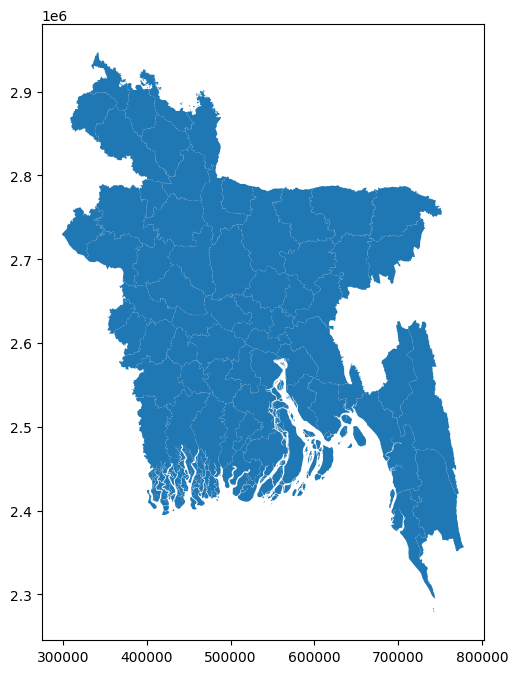

In [20]:
bd_districts.plot(figsize = (12,8))

In [21]:
bd_districts.columns

Index(['OBJECTID', 'admin2Name', 'admin2Pcod', 'admin1Name', 'admin1Pcod',
       'admin0Name', 'admin0Pcod', 'date', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

#### WE ONLY NEED DISTRICT NAME, GEOMETRY (POLYGON)

In [22]:
bd_districts = bd_districts[['admin2Name','geometry']]

In [23]:
bd_districts.head(3)

,admin2Name,geometry
0,Bagerhat,"MULTIPOLYGON (((483486.808 2413780.377, 483518..."
1,Bandarban,"POLYGON ((745209.502 2471361.066, 745307.503 2..."
2,Barguna,"MULTIPOLYGON (((487586.812 2441541.773, 487480..."


<AxesSubplot: >

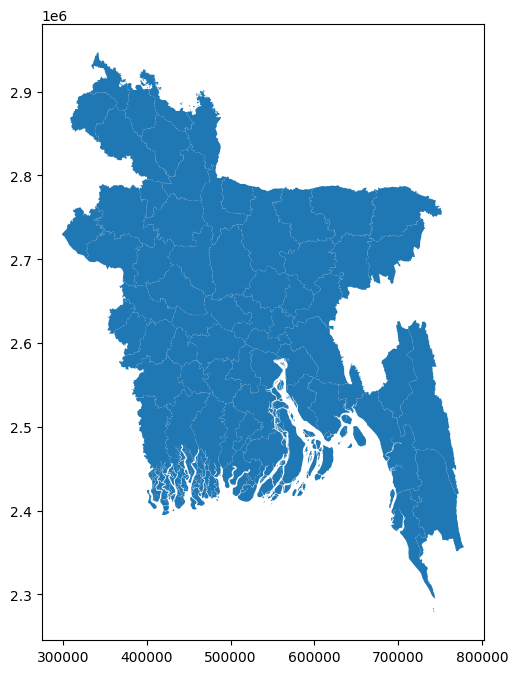

In [24]:
# SEE THE SHAPEFILE
bd_districts.plot(figsize = (12,8))

In [25]:
# renaming the columns:
bd_districts.columns = ['district_name', 'geometry']

In [26]:
bd_districts.columns

Index(['district_name', 'geometry'], dtype='object')

In [27]:
type(bd_districts)

geopandas.geodataframe.GeoDataFrame

In [28]:
bd_districts.head(2)

,district_name,geometry
0,Bagerhat,"MULTIPOLYGON (((483486.808 2413780.377, 483518..."
1,Bandarban,"POLYGON ((745209.502 2471361.066, 745307.503 2..."


In [29]:
# CHANGE THE COORDIANTE REFERENCE SYSTEM TO GET AREA IN METER OF THE POLYGONS
bd_districts.to_crs(epsg = 32645, inplace = True)
# epsg = 4326, WE GET THE LATITUDE, LONGITUDE

In [30]:
# CHECK
bd_districts.head(2)

,district_name,geometry
0,Bagerhat,"MULTIPOLYGON (((793609.319 2416479.170, 793641..."
1,Bandarban,"POLYGON ((1054682.379 2479340.627, 1054782.009..."


### Checking if the district name in df_populatin matches with bd_district

In [31]:
for index, row in bd_districts['district_name'].iteritems():
    if row in df_population['district_name'].tolist():
        pass
    else:
        print('The district',row,' is not in the df_population dataframe')

The district Bogra  is not in the df_population dataframe
The district Brahamanbaria  is not in the df_population dataframe
The district Chittagong  is not in the df_population dataframe
The district Cox's Bazar  is not in the df_population dataframe
The district Jessore  is not in the df_population dataframe
The district Jhalokati  is not in the df_population dataframe
The district Maulvibazar  is not in the df_population dataframe
The district Nawabganj  is not in the df_population dataframe
The district Netrakona  is not in the df_population dataframe


C:\Users\HP\AppData\Local\Temp\ipykernel_9236\3858718144.py:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [32]:
for index, row in df_population['district_name'].iteritems():
    if row in bd_districts['district_name'].tolist():
        pass
    else:
        print('The district',row,' is not in the bd_districts dataframe')

The district Bogura  is not in the bd_districts dataframe
The district Brahmanbaria  is not in the bd_districts dataframe
The district Chapainawabganj  is not in the bd_districts dataframe
The district Chattogram  is not in the bd_districts dataframe
The district Coxsbazar  is not in the bd_districts dataframe
The district Jashore  is not in the bd_districts dataframe
The district Jhalakathi  is not in the bd_districts dataframe
The district Moulvibazar  is not in the bd_districts dataframe
The district Netrokona  is not in the bd_districts dataframe


C:\Users\HP\AppData\Local\Temp\ipykernel_9236\3822261843.py:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



### WE CAN SEE SOME SPELLING MISTAKE, WE HAVE TO MAKE THEM SAME IN BOTH DATAFRAME

In [33]:
bd_districts.replace('Bogra','Bogura',inplace = True)

In [34]:
bd_districts.replace('Brahamanbaria','Brahmanbaria',inplace = True)
bd_districts.replace('Chittagong','Chattogram',inplace = True)
bd_districts.replace("Cox's Bazar","Coxsbazar",inplace = True)
bd_districts.replace('Jessore','Jashore',inplace = True)
bd_districts.replace('Jhalokati','Jhalakathi',inplace = True)
bd_districts.replace('Maulvibazar','Moulvibazar',inplace = True)
bd_districts.replace('Netrakona','Netrokona',inplace = True)
bd_districts.replace('Nawabganj','Chapainawabganj',inplace = True)

## CHECK IF ANY MISMATCH REMAINED?

In [35]:
for index, row in bd_districts['district_name'].iteritems():
    if row in df_population['district_name'].tolist():
        pass
    else:
        print('The district',row,' is not in the df_population dataframe')

C:\Users\HP\AppData\Local\Temp\ipykernel_9236\3858718144.py:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



## MAKE A COLUMN FOR AREA IN sqkm

In [36]:
bd_districts['area(sqkm)'] = bd_districts.area/1000000

In [37]:
bd_districts.head(3)

,district_name,geometry,area(sqkm)
0,Bagerhat,"MULTIPOLYGON (((793609.319 2416479.170, 793641...",3650.448294
1,Bandarban,"POLYGON ((1054682.379 2479340.627, 1054782.009...",4626.660604
2,Barguna,"MULTIPOLYGON (((797168.599 2444345.503, 797062...",1348.025139


### BRING POPULATION COLUMN FROM df_population to bd_districts

In [38]:
bd_districts = bd_districts.merge(df_population, on = 'district_name',how = 'left')

In [39]:
bd_districts.head(2)

,district_name,geometry,area(sqkm),population_2021
0,Bagerhat,"MULTIPOLYGON (((793609.319 2416479.170, 793641...",3650.448294,"1,675,000"
1,Bandarban,"POLYGON ((1054682.379 2479340.627, 1054782.009...",4626.660604,"469,000"


In [40]:
bd_districts.dtypes
# our population values must be float, remove the comma, make it float

district_name        object
geometry           geometry
area(sqkm)          float64
population_2021      object
dtype: object

In [46]:
# REMOVE COMMA:
#df['x']=df['x'].str.replace(',','')
bd_districts['population_2021'] = bd_districts['population_2021'].str.replace(',','')

In [47]:
bd_districts.head(2)

,district_name,geometry,area(sqkm),population_2021
0,Bagerhat,"MULTIPOLYGON (((793609.319 2416479.170, 793641...",3650.448294,1675000
1,Bandarban,"POLYGON ((1054682.379 2479340.627, 1054782.009...",4626.660604,469000


In [48]:
bd_districts.dtypes

district_name        object
geometry           geometry
area(sqkm)          float64
population_2021      object
dtype: object

In [49]:
# MAKE IT FLOAT:
#bd_districts = bd_districts.astype({'population_2021':'float'})
bd_districts['population_2021'] = bd_districts['population_2021'].astype(float)
#bd_districts['population_2021'] = pd.to_numeric(bd_districts['population_2021'],errors='coerce')

In [50]:
bd_districts.dtypes

district_name        object
geometry           geometry
area(sqkm)          float64
population_2021     float64
dtype: object

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(26, 14), dpi=300)
import seaborn as sns

<Figure size 7800x4200 with 0 Axes>

<Figure size 640x480 with 0 Axes>

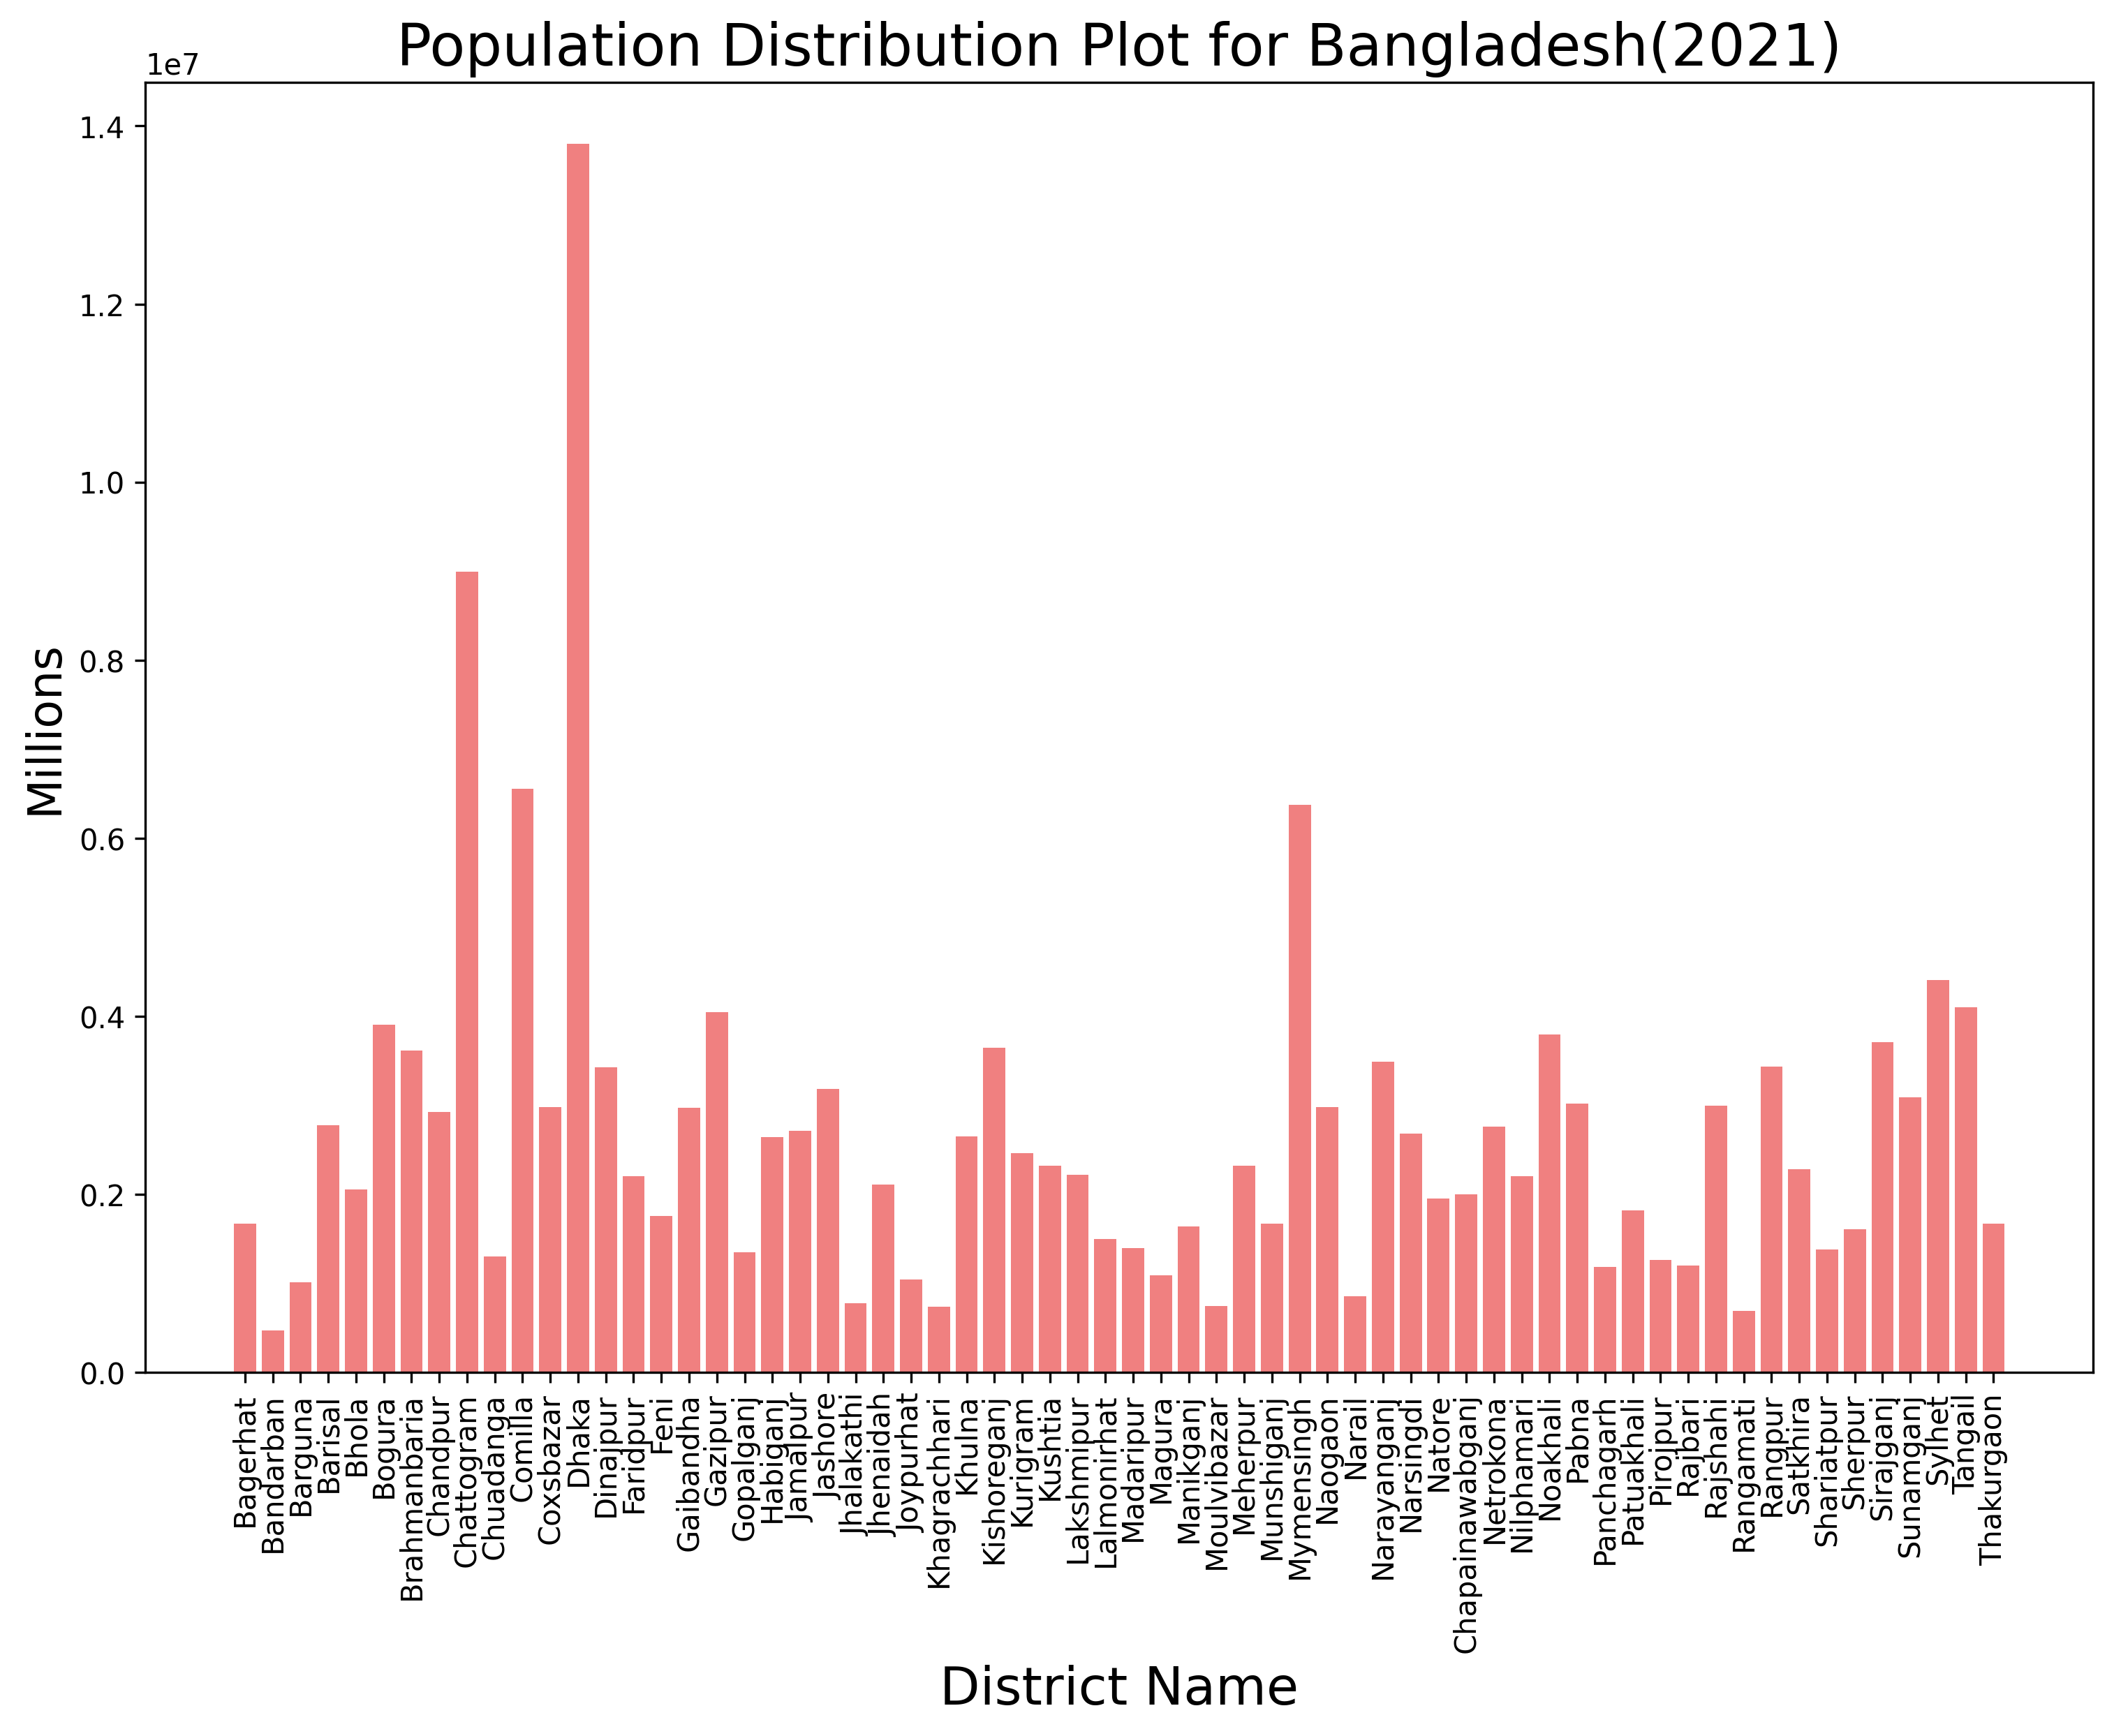

In [100]:
fig = plt.figure()
figure(figsize=(12, 8), dpi=300)
plt.bar( bd_districts.district_name, bd_districts.population_2021, color ='lightcoral')
plt.title('Population Distribution Plot for Bangladesh(2021)', fontsize=20)
plt.xlabel('District Name', fontsize=18)
plt.ylabel('Millions', fontsize=16)
fig.savefig('population_district.jpg')
plt.xticks(rotation=90);


### CREATE COLUMN FOR POPULATION DENSITY

In [51]:
bd_districts['population_density(people/sqkm)'] = bd_districts['population_2021']/bd_districts['area(sqkm)']   

In [52]:
bd_districts.head(5)

,district_name,geometry,area(sqkm),population_2021,population_density(people/sqkm)
0,Bagerhat,"MULTIPOLYGON (((793609.319 2416479.170, 793641...",3650.448294,1675000.0,458.847754
1,Bandarban,"POLYGON ((1054682.379 2479340.627, 1054782.009...",4626.660604,469000.0,101.369009
2,Barguna,"MULTIPOLYGON (((797168.599 2444345.503, 797062...",1348.025139,1013000.0,751.469665
3,Barisal,"MULTIPOLYGON (((865498.861 2502793.647, 865505...",2224.276004,2776000.0,1248.046553
4,Bhola,"MULTIPOLYGON (((889917.545 2421665.125, 889656...",1954.120506,2057000.0,1052.647467


## PLOT THE CHOROPLETH MAP:

<AxesSubplot: >

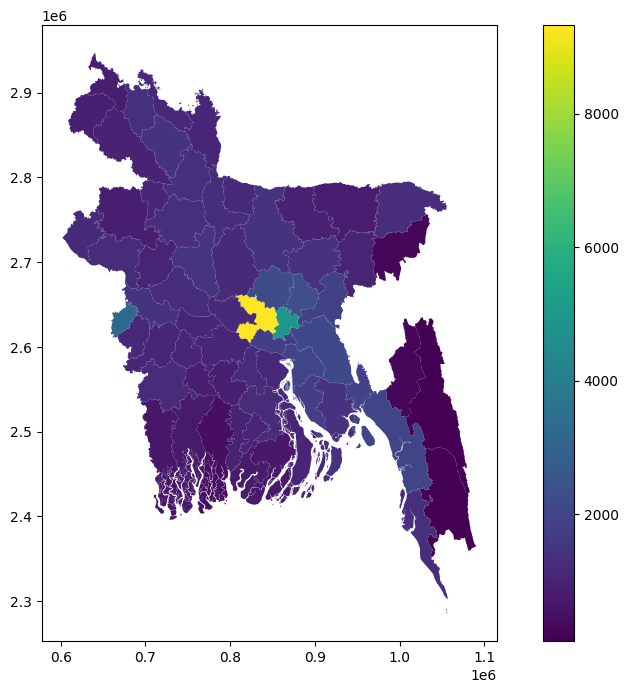

In [54]:
bd_districts.plot(column = 'population_density(people/sqkm)',cmap='viridis',
                  legend = True,figsize=(12,8))

## ADDING LABELS TO THE DISTRICT:

In [58]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [59]:
bd_districts["rep"] = bd_districts["geometry"].representative_point()
bd_districts_points = bd_districts.copy()
bd_districts_points.set_geometry("rep", inplace = True)

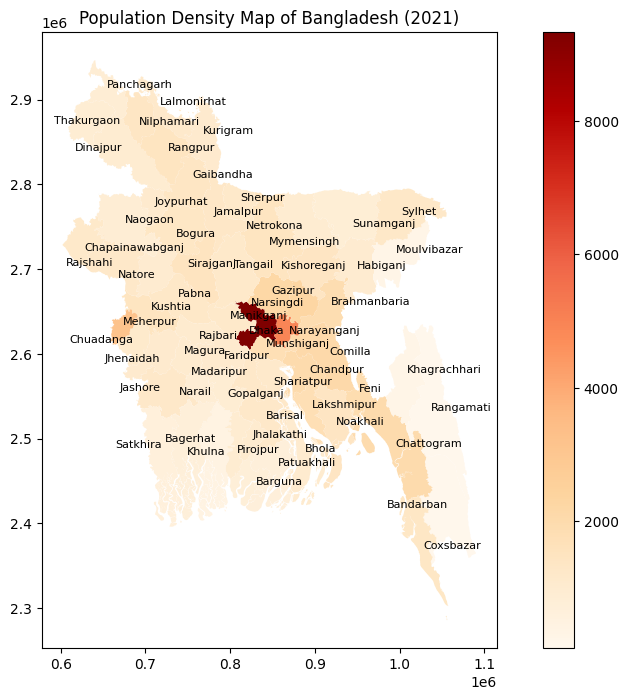

In [68]:
#ax = za.plot(figsize = (15, 12), color = "whitesmoke",
             #edgecolor = "lightgrey", linewidth = 0.5)
bd_districts.plot(column = 'population_density(people/sqkm)',cmap='OrRd',legend = True,
                 figsize=(12,8))  
texts = []

for x, y, label in zip(bd_districts_points.geometry.x, bd_districts_points.geometry.y, bd_districts_points["district_name"]):
    texts.append(plt.text(x, y, label, fontsize = 8, color = 'black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), 
               expand_text=(1,1))
#arrowprops=dict(arrowstyle="-", color='white', lw=0.5)
plt.title('Population Density Map of Bangladesh (2021)');

# SOURCES:
- https://github.com/rubayetalamnse/GIS-DATASETS
- https://github.com/rubayetalamnse/GIS-SHAPEFILE
- https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb
- https://geopandas.org/en/stable/
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- https://matplotlib.org/stable/gallery/color/named_colors.html
- https://adjusttext.readthedocs.io/en/latest/Examples.html
- https://geopandas.org/en/stable/
- https://www.youtube.com/watch?v=Qc-EPKucq0w&t=187s



# DISCUSSION:
Further modification of the label is required.

# DISTRICT MAP OF BANGLADESH:
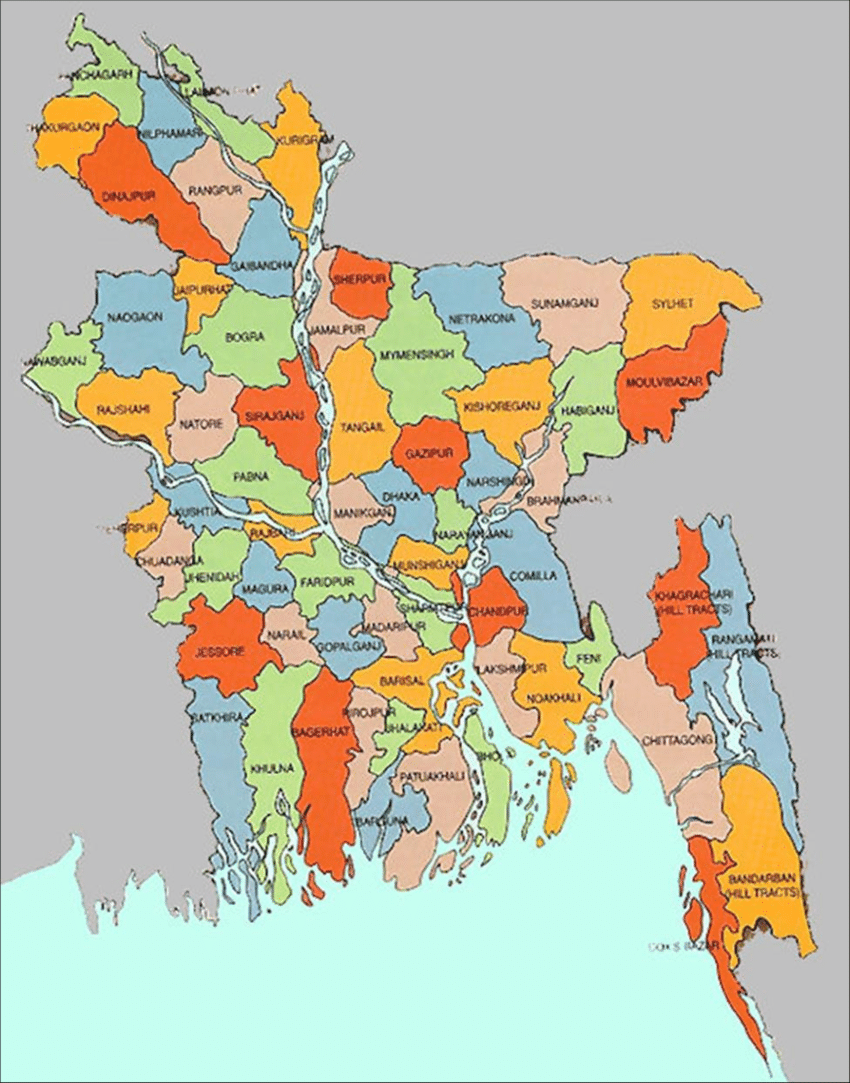